In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

In [2]:
bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

In [4]:
# resource_sweep_goodput = {
#     "FIFO": {
#         30000: [980, 987, 948],
#         25000: [955, 972, 890],
#         20000: [856, 869, 647],
#         15000: [ 33,  38,  48],
#         10000: [  7,   5,   7],
#          5000: [  2,   0,   0],
#     },
#     "EDF": {
#         30000: [989, 994, 973],
#         25000: [983, 987, 961],
#         20000: [956, 961, 901],
#         15000: [680, 688, 614],
#         10000: [294, 248, 250],
#          5000: [ 41,  39,  40],
#     },
#     "TetriSched": {
#         30000: [991, 992, 976],
#         25000: [981, 987, 956],
#         20000: [947, 961, 904],
#         15000: [722, 715, 681],
#         10000: [411, 393, 378],
#          5000: [ 99, 102, 111],
#     },
#     "Graphene": {
#         30000: [982, 991, 960],
#         25000: [969, 981, 918],
#         20000: [904, 917, 753],
#         15000: [456, 425, 374],
#         10000: [223, 228, 189],
#          5000: [ 56,  52,  64],
#     },
#     "DAGSched": {
#         30000: [998, 999, 997],
#         25000: [995, 999, 988],
#         20000: [975, 985, 951],
#         15000: [856, 874, 843],
#         10000: [637, 633, 645],
#          5000: [380, 387, 376],
#     }
# }

In [12]:
resource_sweep_goodput = {
    "FIFO": {
        30000: [96, 149, 85],
        25000: [26, 54, 54],
        20000: [11, 24, 28],
        15000: [3,7,10],
        10000: [1,1,5],
         5000: [0, 1, 0],
    },
    "EDF": {
        30000: [840, 830, 791],
        25000: [492, 475, 464],
        20000: [227, 226, 217],
        15000: [104, 111, 96],
        10000: [54, 40, 44],
         5000: [13, 16, 14],
    },
    "TetriSched": {
        30000: [826, 841, 803],
        25000: [595, 577, 577],
        20000: [415, 402, 402],
        15000: [247, 278, 260],
        10000: [139, 135, 125],
         5000: [33, 38, 33],
    },
    "Graphene": {
        30000: [627, 568, 587],
        25000: [419, 409, 411],
        20000: [312, 293, 294],
        15000: [274, 176, 195],
        10000: [89, 96, 93],
         5000: [30, 26, 23],
    },
    "DAGSched": {
        30000: [931, 921, 904],
        25000: [818, 802, 792],
        20000: [685, 656, 649],
        15000: [531, 517, 512],
        10000: [388, 361, 370],
         5000: [225, 221, 219],
    }
}

In [13]:
resource_gaps = defaultdict(dict)
for scheduler, cluster_size_goodputs in resource_sweep_goodput.items():
    for cluster_size, attainments in cluster_size_goodputs.items():
        dagsched_attainments = np.array(resource_sweep_goodput["DAGSched"][cluster_size])
        scheduler_gap = dagsched_attainments / np.array(attainments)
        resource_gaps[scheduler][cluster_size] = DataPoint(min=np.min(scheduler_gap), mean=np.mean(scheduler_gap), median=np.median(scheduler_gap), max=np.max(scheduler_gap), sd=np.std(scheduler_gap, ddof=1))

resource_gaps

/tmp/ipykernel_32307/1813506734.py:5: RuntimeWarning: divide by zero encountered in divide
  scheduler_gap = dagsched_attainments / np.array(attainments)
/data/sukritk/scheduling/erdos-scheduling-simulator/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


defaultdict(dict,
            {'FIFO': {30000: DataPoint(min=6.181208053691275, mean=8.838139612668334, median=9.697916666666666, max=10.635294117647058, sd=2.3482191344118246),
              25000: DataPoint(min=14.666666666666666, mean=20.326685660018992, median=14.851851851851851, max=31.46153846153846, sd=9.643509919724895),
              20000: DataPoint(min=23.178571428571427, mean=37.59487734487735, median=27.333333333333332, max=62.27272727272727, sd=21.472371071156235),
              15000: DataPoint(min=51.2, mean=100.6857142857143, median=73.85714285714286, max=177.0, sd=67.0540019959545),
              10000: DataPoint(min=74.0, mean=274.3333333333333, median=361.0, max=388.0, sd=174.01819828205709),
              5000: DataPoint(min=221.0, mean=inf, median=inf, max=inf, sd=nan)},
             'EDF': {30000: DataPoint(min=1.1083333333333334, mean=1.1202763434691145, median=1.1096385542168674, max=1.1428571428571428, sd=0.01956643238151724),
              25000: DataPoint(mi

In [20]:
resource_gaps["TetriSched"]

{30000: DataPoint(min=1.0951248513674197, mean=1.116007275564333, median=1.1257783312577834, max=1.1271186440677967, sd=0.018097122419380742),
 25000: DataPoint(min=1.3726169844020797, mean=1.379118302433625, median=1.3747899159663866, max=1.389948006932409, sd=0.009441519080318926),
 20000: DataPoint(min=1.6144278606965174, mean=1.6322903554516575, median=1.6318407960199004, max=1.6506024096385543, sd=0.018091464162747203),
 15000: DataPoint(min=1.8597122302158273, mean=1.9929135234322664, median=1.9692307692307693, max=2.1497975708502026, sd=0.1464855994549184),
 10000: DataPoint(min=2.674074074074074, mean=2.8084803268496317, median=2.79136690647482, max=2.96, sd=0.14372912247294656),
 5000: DataPoint(min=5.815789473684211, mean=6.4234449760765555, median=6.636363636363637, max=6.818181818181818, sd=0.5340396708117169)}

dict_keys([0, 1, 2, 3, 4, 5])


/tmp/ipykernel_32307/4094196313.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, ylim))


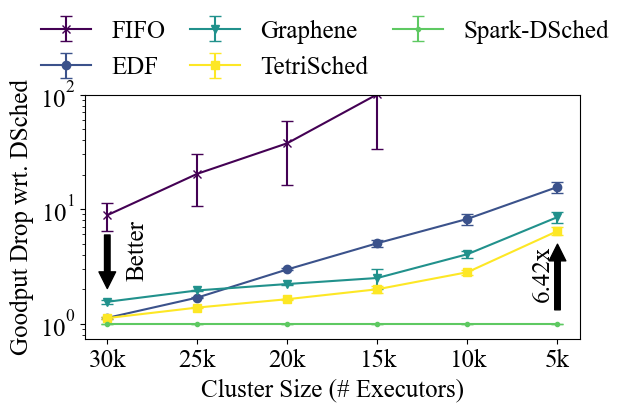

In [153]:
from matplotlib.legend_handler import HandlerTuple

fig = plt.figure(figsize=(6,3.5))
x_vals = dict(enumerate(list(sorted(resource_gaps["EDF"].keys(), reverse=True))))
# plt.figure(figsize=(7,5.25))
print(x_vals.keys())
plt.errorbar(x_vals.keys(), 
             [resource_gaps["FIFO"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["FIFO"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='x', label="FIFO", color=fifo, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["EDF"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["EDF"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='o', label="EDF", color=edf, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["Graphene"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["Graphene"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='v', label="Graphene", color=graphene, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["TetriSched"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["TetriSched"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='s', label="TetriSched", color=tetrisched, capsize=4)
plt.errorbar(x_vals.keys(), 
             [resource_gaps["DAGSched"][x_vals[x]].mean for x in x_vals.keys()], 
             yerr=[resource_gaps["DAGSched"][x_vals[x]].sd  for x in x_vals.keys()], 
             marker='.', label="Spark-DSched", color=dagsched, capsize=4)
ylim = 100
plt.yscale("log")
plt.ylim((0, ylim))
# plt.xticks(x_vals.keys(), ["30k", "25k", "20k", "10k", "5k"])?
plt.xticks(ticks=list(x_vals.keys()), labels=["30k", "25k", "20k", "15k", "10k", "5k"])
# plt.yticks(ticks=list(np.arange(2, ylim, 2)), labels=[f"{int(x)}x" for x in np.arange(2, ylim, 2)])
plt.xlabel("Cluster Size (# Executors)", fontsize=18)
plt.ylabel("Goodput Drop wrt. DSched", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.annotate('', xy=(0, 2), xytext=(0, 6),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.annotate('', xy=(5, 5), xytext=(5, 1.3),
             arrowprops=dict(facecolor='black', shrink=0.01))
plt.text(0.2, 2.7, "Better", rotation="vertical", color='black', fontsize=18)
plt.text(4.7, 1.75, "6.42x", rotation="vertical", color='black', fontsize=18)
plt.tight_layout()

# fig.axes[0].get_legend_handles_labels()
lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]


# fig.legend(lines[:2], labels[:2], fontsize=18,ncol=1, columnspacing=0.6, frameon=False,loc="center",  bbox_to_anchor=(0.5, 0.55))
# fig.legend(lines[2:4], labels[2:4], fontsize=18,ncol=1, columnspacing=0.6, frameon=False,loc="upper right",  bbox_to_anchor=(1, 0.97))
# fig.legend(lines[4:], labels[4:], fontsize=18,ncol=1, columnspacing=0.6, frameon=False,loc="upper left",  bbox_to_anchor=(0.12, 0.95))
fig.legend(lines, labels, fontsize=18, frameon=False,ncol=3, loc="upper center", bbox_to_anchor=(0.55, 1.2),columnspacing=1)

# handler = HandlerTuple(ndivide=2, pad=0.4)

# plt.legend( loc="upper right", fontsize=14, columnspacing=10, frameon=False, ncol=2, handler_map={tuple: handler})
plt.tight_layout()
plt.savefig("cluster_size_sweep.pdf", pad_inches=0, dpi=300, bbox_inches="tight")